# **Anomaly Detection in Bank Transations using Statistical Outlier Methods**

## Problem Statement

> A bank wants to detect suspicious transactions that significantly deviate from normal customer spending behavior.

Outliers may indicate:

* Fraud
* System errors
* Data entry mistakes
* Unusual high-value withdrawals

The objective is to identify anomalous transactions using:
* Z-score method
* IQR (Interquartile Range)
* Five-number summary

### Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

### Generating Sample Data

In [2]:
np.random.seed(42)

# Simulating normal spending around 2000
normal_transactions = np.random.normal(loc=2000, scale=500, size=100)

# Adding extreme outliers
outliers = np.array([15000, 20000, 50000])

transactions = np.concatenate([normal_transactions, outliers])

df = pd.DataFrame({
    "Transaction_Amount": np.round(transactions, 2)
})

df.head()

,Transaction_Amount
0,2248.36
1,1930.87
2,2323.84
3,2761.51
4,1882.92


(array([100.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  690.13 ,  5621.117, 10552.104, 15483.091, 20414.078, 25345.065,
        30276.052, 35207.039, 40138.026, 45069.013, 50000.   ]),
 <BarContainer object of 10 artists>)

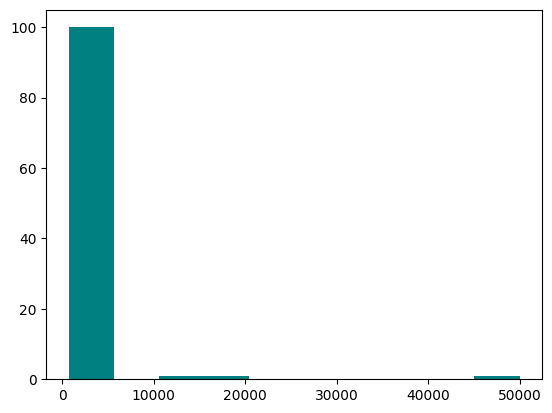

In [5]:
plt.hist(df, color='teal')

### **Method 1: Z-Score**
> Z = X − μ ​/ σ

A Z-score measures how many standard deviations a data point is away from the mean.

If |Z| > 3, then considered an outlier.

In [7]:
df["Z_score"] = zscore(df["Transaction_Amount"])

df["Z_Outlier"] = np.where(abs(df["Z_score"]) > 3, True, False)

df[df["Z_Outlier"] == True]

,Transaction_Amount,Z_score,Z_Outlier
101,20000.0,3.335930,True
102,50000.0,9.126329,True


### **Method 2: IQR (Inter-Quartile Range) method**
1. Sort the dataset
2. Compute Quartiles then calculate IQR = (Q3 - Q1)
3. Define Bounds:
* Lower=Q1 − 1.5 × IQR
* Upper=Q3 + 1.5 × IQR

In [8]:
Q1 = df["Transaction_Amount"].quantile(0.25)
Q3 = df["Transaction_Amount"].quantile(0.75)

IQR = Q3 - Q1

In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["IQR_Outlier"] = np.where(
    (df["Transaction_Amount"] < lower_bound) |
    (df["Transaction_Amount"] > upper_bound),
    True, False
)

df[df["IQR_Outlier"] == True]

,Transaction_Amount,Z_score,Z_Outlier,IQR_Outlier
74,690.13,-0.391132,False,True
100,15000.00,2.370864,False,True
101,20000.00,3.335930,True,True
102,50000.00,9.126329,True,True


> *Implemented both Z-score and IQR methods for anomaly detection in financial transactions and observed that Z-score is sensitive to extreme values, whereas IQR is more robust in skewed distributions.*

### **Method 3: Five Number Summary**
The five-number summary consists of:
* Minimum
* Q1
* Median
* Q3
* Maximum

> We analyze whether:
Max >> Q3 or Min << Q1

This gives quick statistical intuition.

In [10]:
df["Transaction_Amount"].describe()

,Transaction_Amount
count,103.000000
mean,2716.579126
std,5206.324980
min,690.130000
25%,1709.270000
50%,1963.990000
75%,2263.955000
max,50000.000000


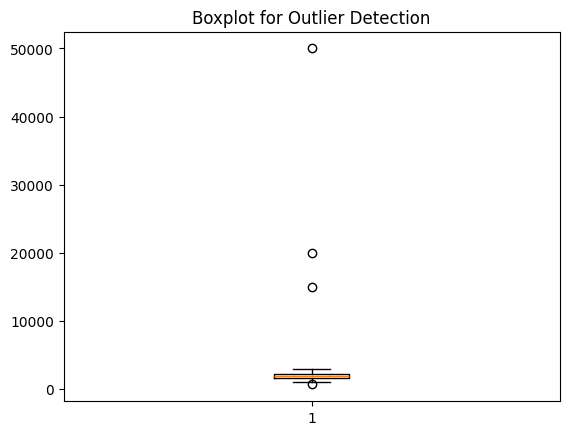

In [11]:
plt.boxplot(df["Transaction_Amount"])
plt.title("Boxplot for Outlier Detection")
plt.show()